## TESINA DIPLOMADO
## BIOINFORMATICA 2021. 

### ESTUDIO COMPARATIVO DE MODELOS PREDICTIVOS DE MACHINELEARNING, VARIANDO FUNCIÓN ESCALADORA EN ETAPA DE PRE-PROCESAMIENTO DE DATOS.

#### En el presente trabajo de tesina, para diplomado bioinformática 2021, se estudia el efecto que tienen distintas funciones escaladoras/normalizadoras en el paso de escalamiento/normalización de características(Featuring Scaling) en la etapa de PRE-Procesamiento, en un proceso de MachineLearning. (ML).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.ensemble
import sklearn.linear_model
import sklearn.neighbors
import sklearn.dummy

import numpy as np

from sklearn.model_selection import train_test_split


#TESINA
# ESCALADORES
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

Para entrenar y probar los modelos de regressión, utilizo un conjunto de datos que contiene un valora predecir (en ultima columna),  junto con características.

### DATABASES

In [18]:
#data = pd.read_csv("DATA/absentismo.csv")
#data = pd.read_csv("DATA/Admission_Predict.csv")
data = pd.read_csv("DATA/diabetes.csv")
#data = pd.read_csv("DATA/insurance2.csv")
#data = pd.read_csv("DATA/iris.data")
#data = pd.read_csv("DATA/wine.csv")

In [3]:
data

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [39]:
data.head()

,Serial No.,GRE Score,TOEFL Score,UniversityRating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Verificamos con el método pandas.DataFrame.describe() que las variables no tienen el mismo rango, por lo que seria necesario reescalarlas.

In [19]:
data.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [9]:
data.shape # Obtenemos las dimensiones de nuestro conjunto de datos.

(1338, 6)

Para obtener una intuición general de las relaciones que existen entre variables, una práctica habitual es evaluar la correlación que existe entre las variables, sobretodo la correlación que existe entre las características y la etiqueta. Para esto utilizamos indicadores de estadística clásica como es el coeficiente de correlación de Pearson o Spearman.

In [8]:
correlation = data.corr() # Por defecto este método calcula la correlación de Pearson.
correlation

,Serial No.,GRE Score,TOEFL Score,UniversityRating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
UniversityRating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance_of_Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

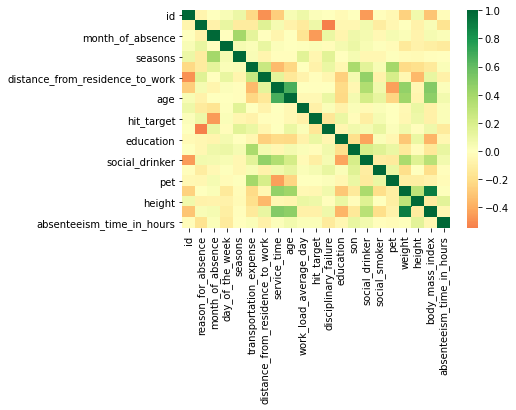

In [5]:
sns.heatmap(
    correlation,
    cmap="RdYlGn", # Utilizamos una paleta de colores divergente para visualizar diferencias en los valores positivos y negativos
    center = 0
) # Utilizamos seaborn para visualizar un mapa de calor de las correlaciones.

También podemos visualizar en un gráfico de dispersión cómo se correlacionan las características.

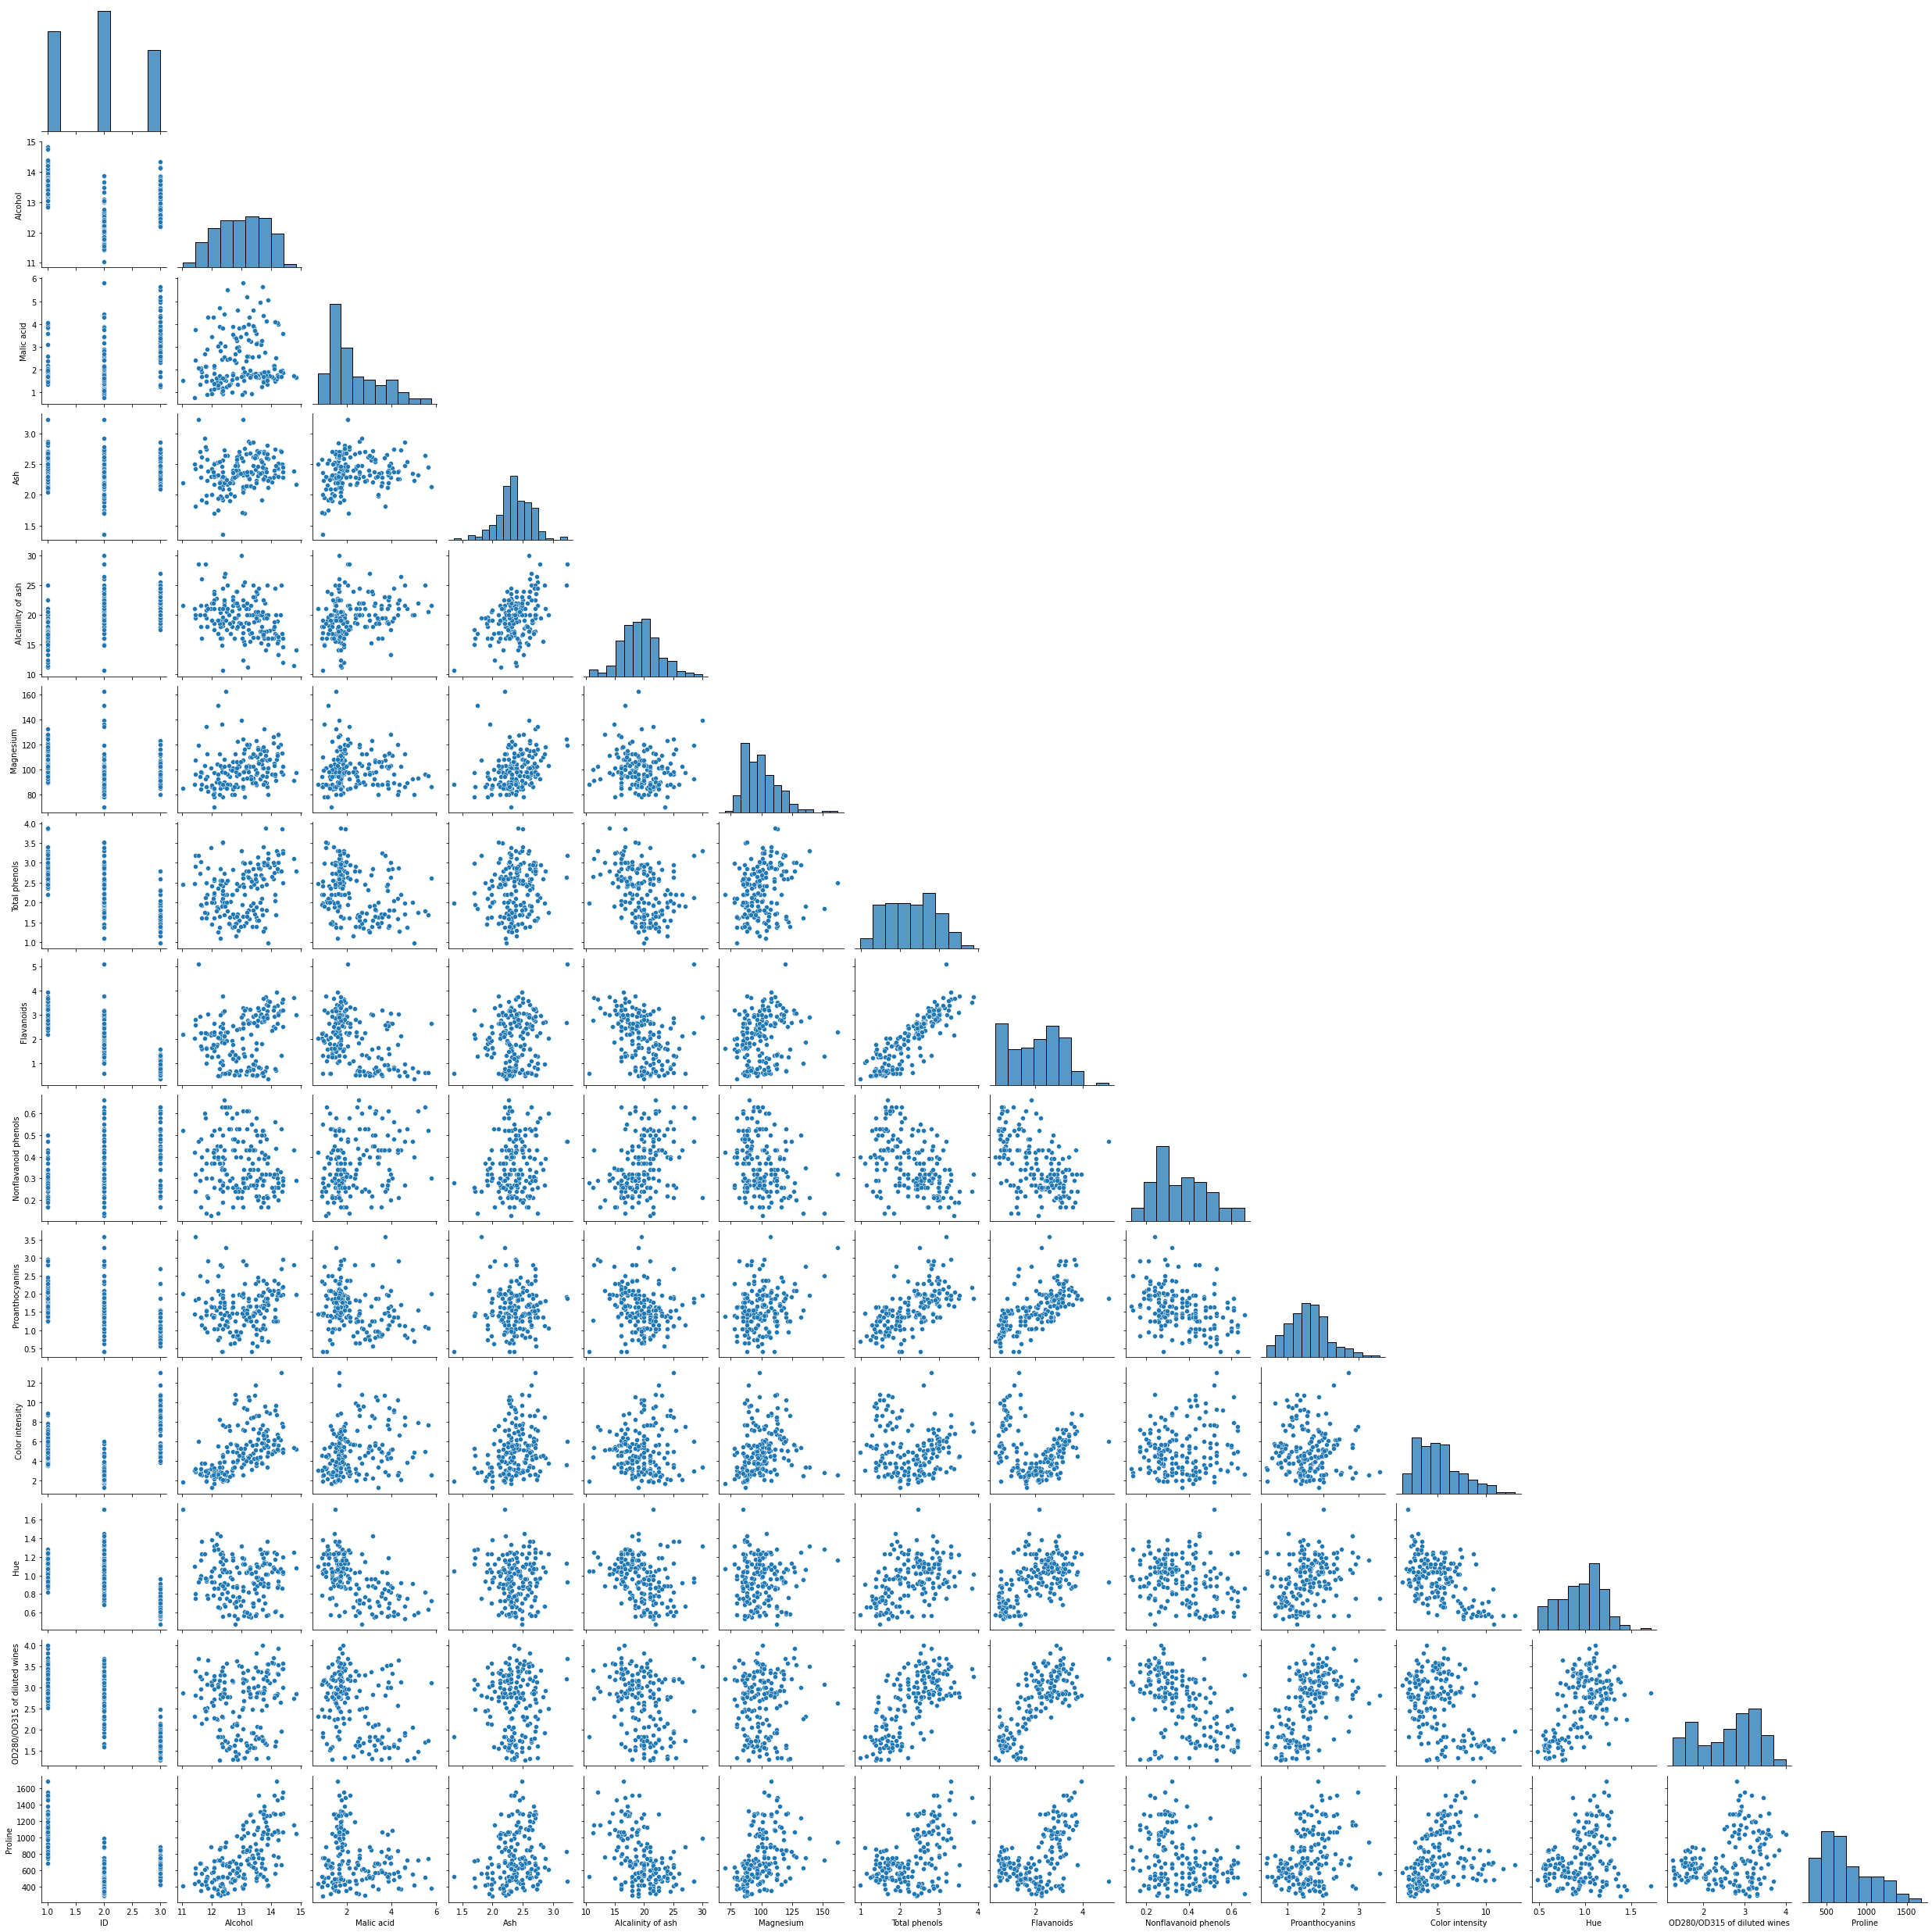

In [17]:
sns.pairplot(data, corner=True)

Exploramos en detalle la variable que más se correlaciona con el valor a predecir


Confirmamos la diferencia con una prueba estadística.

In [4]:
scipy.stats.ttest_ind(*data.groupby(by="smoker")["charges"].apply(list))

Ttest_indResult(statistic=-46.664921172723716, pvalue=8.271435842177219e-283)

## Preprocesamiento

In [4]:
#TESINA

#print (data)
#transforma data pandas -> data Numpy
dataNum=data.to_numpy()
print (dataNum)

print (type(dataNum))

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1

### FUNCIONES PARA TESINA

In [5]:
#TESINA

#recibe vector Xdatos numpy -> Xnormalizado numpy, alfa
def Xnormalizado(vector):  
    #EXP
    #alfa = 1/np.mean(vector)
    #vectorNorm= 1-np.exp(-alfa*vector)
    
    #ATAN
    #promedio= np.mean(vector)
    #Centrado=vector-promedio
    #alfa=1/np.std(Centrado)
    #vectorNorm = 2/3.14*np.arctan(alfa*Centrado)
    
    
    #SIGMOIDE
    alfa = 1/np.mean(vector)
    vectorNorm = 1/(1+np.exp(-alfa*vector))
    
    #OTRA FUNCION
    #alfa = 
    #vectorNorm = 

    
    return vectorNorm, alfa

#recibe vector normalizado numpy, alfa  ->  vector datos numpy
def XRevers(vectorN, alfa):  
    #EXP
    vectorRevers= -1/alfa*np.log(1-vectorN)
    
    #ATAN
    #vectorRevers= 1/alfa*np.tan(3.14/2*vectorNorm)
    
    
    return vectorRevers 


 
#recibe matriz datos.numpy -> metrix datos normalizada. numpy , alfas
def MatrixNorm(Matrix):
    filas, columnas = Matrix.shape
    
    MNorm = np.zeros((filas, columnas))
    alfas = np.zeros((1, columnas))
    
    for i in range(columnas):
        dcolum= Matrix[:,i]  #fila,column
        dcolumNorm, alfa = Xnormalizado(dcolum)
        
        MNorm[:,i]=dcolumNorm
        alfas[:,i]=alfa
           
    return MNorm, alfas


#recibe matriz datos.numpy Normalizada,alfas-> metrix datos numpy
def MatrixNormRevers(MNorm,alfas):
   
    
    filas, columnas = MNorm.shape
    array = np.zeros((filas, columnas))
    
    
    for i in range(columnas):
        dcolum= MNorm[:,i]  #fila,column
        alfa=alfas[:,i]
        
        dcolumR= XRevers(dcolum,alfa)
            
        array[:,i]=dcolumR
        
       
    
    return array
   
    

In [3]:
#FLUJO SKLEARN

features = data.iloc[:,:-1]

feature_names = features.columns
feature_names

Index(['1. sepal length in cm', '2. sepal width in cm',
       '3. petal length in cm', '4. petal width in cm'],
      dtype='object')

In [4]:
#FLUJO SKLEARN 
features

,1. sepal length in cm,2. sepal width in cm,3. petal length in cm,4. petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
#TESINA


featuresPD = data.iloc[:,:-1]

feature_names = featuresPD.columns
feature_names



Index(['1. sepal length in cm', '2. sepal width in cm',
       '3. petal length in cm', '4. petal width in cm'],
      dtype='object')

In [7]:
#TESINA

featNumpy=featuresPD.to_numpy()
featNorm=MatrixNorm(featNumpy)


features, alfas=featNorm



In [8]:
#TESINA

featNorm

(array([[0.7053258 , 0.75878649, 0.59205629, 0.54161651],
        [0.69816237, 0.72756797, 0.59205629, 0.54161651],
        [0.69090111, 0.7403534 , 0.58561506, 0.54161651],
        [0.68723451, 0.73400966, 0.59846604, 0.54161651],
        [0.70175645, 0.76472872, 0.59205629, 0.54161651],
        [0.71588289, 0.78194102, 0.6111831 , 0.58266037],
        [0.68723451, 0.75274271, 0.59205629, 0.56224495],
        [0.70175645, 0.75274271, 0.59846604, 0.54161651],
        [0.67983091, 0.72102956, 0.59205629, 0.54161651],
        [0.69816237, 0.73400966, 0.59846604, 0.52084442],
        [0.71588289, 0.77056882, 0.59846604, 0.54161651],
        [0.69454382, 0.75274271, 0.60484231, 0.54161651],
        [0.69454382, 0.72756797, 0.59205629, 0.52084442],
        [0.67609456, 0.72756797, 0.57264648, 0.52084442],
        [0.72959804, 0.78747261, 0.57914442, 0.54161651],
        [0.72620856, 0.80856821, 0.59846604, 0.58266037],
        [0.71588289, 0.78194102, 0.58561506, 0.58266037],
        [0.705

In [9]:
#AMBOS 
#LABEL 


#label = data.charges   #insurance2.csv
#label = data.absenteeism_time_in_hours   #absentismo.csv
#label = data.Chance_of_Admit   #Admission_Predict.csv
#label = data.Y   #diabetes.csv
#label = data.Proline  #wine.csv
label = data.classvegetal  # iris.data
label

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: classvegetal, Length: 150, dtype: int64

In [24]:
features.shape

(1338, 5)

Los algoritmos para entrenar modelos de aprendizaje de máquinas no se comportan bien en su mayoría con diferencias en los rangos de valores de sus características, por lo que es siempre una buena práctica reescalar los valores hacia un rango predeterminado.

## ESCALADORES SKLEARN

In [5]:
#FLUJO SKLEARN
#ESCALADORES SKLEARN

# Instanciamos la clase del scaler que realizará una normalización de los datos


#CONTROL
# sin escalamiento


#MINMAX
#scaler = sklearn.preprocessing.MinMaxScaler() 

#StandardScaler
#scaler = sklearn.preprocessing.StandardScaler()

#MaxAbsScaler
#scaler = sklearn.preprocessing.MaxAbsScaler()

#RobustScaler
#scaler = sklearn.preprocessing.RobustScaler(quantile_range=(25, 75))

#PowerTransformer(method="yeo-johnson")
#scaler = sklearn.preprocessing.PowerTransformer(method="yeo-johnson")

#QuantileTransformer(output_distribution="uniform")
#scaler = sklearn.preprocessing.QuantileTransformer(output_distribution="uniform")

#QuantileTransformer(output_distribution="normal")
#scaler = sklearn.preprocessing.QuantileTransformer(output_distribution="normal")

#Normalizer()
scaler = sklearn.preprocessing.Normalizer()


features[:] = scaler.fit_transform(features) # Ajustamos el scaler y al mismo tiempo transformamos nuestras características



In [7]:
features

,1. sepal length in cm,2. sepal width in cm,3. petal length in cm,4. petal width in cm
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


In [10]:
#TESINA
features=pd.DataFrame(features)


In [49]:
feature_names

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'UniversityRating', 'SOP',
       'LOR ', 'CGPA', 'Research'],
      dtype='object')

In [11]:
#TESINA

features.columns=feature_names
features

,1. sepal length in cm,2. sepal width in cm,3. petal length in cm,4. petal width in cm
0,0.705326,0.758786,0.592056,0.541617
1,0.698162,0.727568,0.592056,0.541617
2,0.690901,0.740353,0.585615,0.541617
3,0.687235,0.734010,0.598466,0.541617
4,0.701756,0.764729,0.592056,0.541617
...,...,...,...,...
145,0.758890,0.727568,0.799548,0.872004
146,0.746144,0.693939,0.790883,0.829925
147,0.752572,0.727568,0.799548,0.841378
148,0.742889,0.752743,0.807940,0.872004


In [12]:
features.describe()

,1. sepal length in cm,2. sepal width in cm,3. petal length in cm,4. petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,0.730152,0.730150,0.721667,0.714238
std,0.027563,0.027596,0.094150,0.125186
min,0.676095,0.658109,0.566123,0.520844
25%,0.705326,0.714396,0.604842,0.562245
50%,0.729598,0.727568,0.760838,0.747352
75%,0.749372,0.746598,0.795250,0.817823
max,0.794451,0.808568,0.862446,0.889501


In [13]:
#AMBOS 

#SE DIVIDE LA DATABASE NORMALIZADA EN CONJUNTO ENTRENAMIENTO (TRAIN), 
# Y TEST, 

features_train, features_test, label_train, label_test = sklearn.model_selection.train_test_split( 
    features,
    label,
    test_size=0.30, 
    random_state = 11, 
)

## Modelamiento - ENTRENAMIENTO

Para evaluar el rendimiento de nuestro modelos sobre el conjunto de prueba debemos utilizar métricas distintas a las que usábamos en clasificación. sklearn nos ofrece una serie de métricas especificas para regresión, las cuales se encuentran todas descritas en la documentación https://scikit-learn.org/stable/modules/model_evaluation.html .

In [14]:
def regression_report(y_true, y_pred):
    """
    Esta función recibe un arreglo de valores reales y predichos para 
    retornar un diccionario con una serie de métricas de regresión
    """
    return {
        'mae': sklearn.metrics.mean_absolute_error(y_true, y_pred),
        'rmse': sklearn.metrics.mean_squared_error(y_true, y_pred) ** 0.5,
        'r2': sklearn.metrics.r2_score(y_true, y_pred)
    }


### Regresión lineal

In [15]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(features_train, label_train)
features_test

,1. sepal length in cm,2. sepal width in cm,3. petal length in cm,4. petal width in cm
112,0.762008,0.727568,0.812035,0.852198
145,0.758890,0.727568,0.799548,0.872004
133,0.746144,0.714396,0.795250,0.777540
56,0.746144,0.746598,0.777377,0.791636
111,0.749372,0.707668,0.803778,0.829925
9,0.698162,0.734010,0.598466,0.520844
65,0.758890,0.734010,0.763258,0.762777
15,0.726209,0.808568,0.598466,0.582660
30,0.694544,0.734010,0.604842,0.541617
63,0.739607,0.721030,0.777377,0.762777


In [16]:
lr_predictions = lr.predict(features_test)
lr_predictions

array([ 1.81855059,  1.85684186,  1.47768019,  1.50977959,  1.70249199,
       -0.16921564,  1.28549952,  0.10920318, -0.05100417,  1.37525462,
        1.42704507,  0.91823052,  1.47144884,  1.74060711,  1.8032098 ,
       -0.09278154,  1.73080842,  1.45260501,  1.75299246,  1.72264954,
        1.03477985, -0.10804511, -0.14004158,  1.39857543, -0.19402514,
       -0.02396527,  1.69379019,  1.28477901,  0.04804492,  1.50850216,
       -0.09527222,  1.93943746,  1.85730301, -0.10313079, -0.03191372,
        1.98574468,  1.91430371,  1.55474381, -0.15902405,  1.55121144,
        0.88772711,  1.89119692,  0.02786245,  1.41945726,  1.93213667])

In [17]:
lr_vil = pd.DataFrame(lr.coef_,columns=["value"]) # Guardamos en un dataframe los coeficientes
lr_vil.index = feature_names
lr_vil

,value
1. sepal length in cm,-2.727092
2. sepal width in cm,1.443379
3. petal length in cm,3.959557
4. petal width in cm,4.000377


In [18]:
lr_predictions

array([ 1.81855059,  1.85684186,  1.47768019,  1.50977959,  1.70249199,
       -0.16921564,  1.28549952,  0.10920318, -0.05100417,  1.37525462,
        1.42704507,  0.91823052,  1.47144884,  1.74060711,  1.8032098 ,
       -0.09278154,  1.73080842,  1.45260501,  1.75299246,  1.72264954,
        1.03477985, -0.10804511, -0.14004158,  1.39857543, -0.19402514,
       -0.02396527,  1.69379019,  1.28477901,  0.04804492,  1.50850216,
       -0.09527222,  1.93943746,  1.85730301, -0.10313079, -0.03191372,
        1.98574468,  1.91430371,  1.55474381, -0.15902405,  1.55121144,
        0.88772711,  1.89119692,  0.02786245,  1.41945726,  1.93213667])

In [19]:
lr_regression_report = regression_report(label_test, lr_predictions)
lr_regression_report

{'mae': 0.22549820013065233,
 'rmse': 0.28235016674092644,
 'r2': 0.8835236120247305}

### k-Nearest Neighbors

In [20]:
knn = sklearn.neighbors.KNeighborsRegressor() # Instanciamos una support vector machine con un kernel lineal
knn.fit(features_train, label_train)

KNeighborsRegressor()

In [21]:
knn_predictions = knn.predict(features_test)
knn_regression_report = regression_report(label_test, knn_predictions)
knn_regression_report

{'mae': 0.08, 'rmse': 0.24221202832779934, 'r2': 0.9142857142857143}

### Random Forest

In [22]:
rf = sklearn.ensemble.RandomForestRegressor()
rf.fit(features_train, label_train)

RandomForestRegressor()

In [23]:
rf_predictions = rf.predict(features_test)

rf_vil = pd.DataFrame(list(zip(feature_names,rf.feature_importances_)),
             columns=["feature","importance"]
            ).set_index("feature")
rf_vil.sort_values("importance",ascending=False)

,importance
feature,
4. petal width in cm,0.577840
3. petal length in cm,0.413278
2. sepal width in cm,0.006305
1. sepal length in cm,0.002577


In [24]:
rf_regression_report = regression_report(label_test, rf_predictions)
rf_regression_report

{'mae': 0.10577777777777778,
 'rmse': 0.27528571016713205,
 'r2': 0.8892792207792208}

### Regresor tonto

In [25]:
dummy = sklearn.dummy.DummyRegressor()
dummy.fit(features_train, label_train)

DummyRegressor()

In [26]:
dummy_predictions = dummy.predict(features_test)
dummy_regression_report = regression_report(label_test, dummy_predictions)
dummy_regression_report

{'mae': 0.6996825396825397,
 'rmse': 0.832775323379016,
 'r2': -0.013252054068380037}

## Resumen

Evaluemos cuál fue el modelo que tuvo el mejor rendimiento en cada una de las métricas.

In [27]:
performances = pd.DataFrame( # Consolidamos todas las métricas en un DatFrame
    data = [
        lr_regression_report,
        knn_regression_report,
        rf_regression_report,
        dummy_regression_report
    ],
    index = [
        "Linear Regression",
        "k-Nearest Neighbors",
        "Random Forest",
        "Regresor Tonto"
    ]
).sort_values( # Ordenamos los valores
    by="rmse"
)
performances

,mae,rmse,r2
k-Nearest Neighbors,0.080000,0.242212,0.914286
Random Forest,0.105778,0.275286,0.889279
Linear Regression,0.225498,0.282350,0.883524
Regresor Tonto,0.699683,0.832775,-0.013252


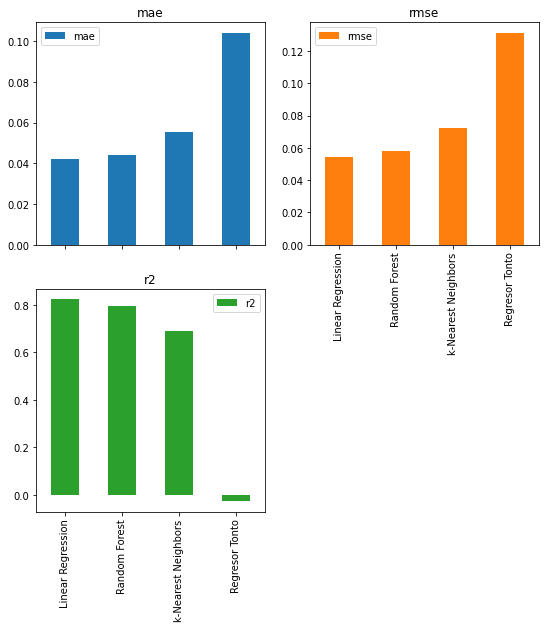

In [67]:
performances.plot.bar(
    subplots=True,
    layout=(2,2),
    figsize=(9,9)
)
plt.show()

In [28]:
performances.to_excel("RESULTADOS.xlsx")